In this notebook, the task is to accurately identify 10 different type of animal images . There are 26K images , but due to memory restrictions while using Kaggle platform, only 1000 images are considered for training , 300 images for validation and 200 images for testing.
Model building using CNN + Max Pooling layers is done.  4 layers to 8 layers models are built and tested for their performance.
Model metrics is overall accuracy and F1 score of individual class.
This is the first slice of images into train , validation and test set images.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import os

In [2]:

train_dir = '../input/animals10/raw-img'


In [3]:
LABELS = os.listdir(train_dir)
LABELS.sort()
LABELS

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [4]:
## map the labels to numeric values 

names = {LABELS[0] : 0 ,LABELS[1]: 1 , LABELS[2] : 2  , LABELS[3] : 3 , LABELS[4] : 4 , LABELS[5] : 5, LABELS[6] : 6, LABELS[7] : 7 , LABELS[8] : 8 , LABELS[9] : 9}

In [5]:
names

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [6]:
import cv2
import os

def load_images_from_folder(path, dirs):
    images = []
    img_class = []
    
    for c in dirs: ## for each class directory , read in the images and store 
        
        file_path = os.path.join(path, c)
        
        for file in os.listdir(file_path):
        
            img_class.append(c)
            img = cv2.imread(os.path.join(file_path,file))
            img = cv2.resize(img , (224,224))
            if img is not None:
                images.append(img)
                
    return images, img_class

images , image_class = load_images_from_folder("../input/animals10/raw-img", LABELS)

In [7]:
len(images) , len(image_class)

(26179, 26179)

In [8]:
type(images) , type(image_class)

(list, list)

In [9]:
images = np.array(images)
images.shape

(26179, 224, 224, 3)

In [10]:
## convert the character class names to numeric values 
image_class_numeric = [names[i] for i in image_class]
pd.Series(image_class_numeric).value_counts()

0    4863
8    4821
4    3098
1    2623
3    2112
6    1866
9    1862
7    1820
5    1668
2    1446
dtype: int64

In [11]:
image_class_numeric = np.array(image_class_numeric)
image_class_numeric.shape

(26179,)

In [12]:
## Using sklearn train_test_split 
train, x_val_test, y_train, y_val_test = train_test_split(images, image_class_numeric , stratify = image_class_numeric, test_size = 0.25 , random_state = 12)
val, test, y_val, y_test = train_test_split(x_val_test, y_val_test , stratify = y_val_test, test_size = 0.4)

print("train size :{}".format(train.shape))
print("y_train size :{}".format(y_train.shape))
##
print("val size :{}".format(val.shape))
print("y_val size :{}".format(y_val.shape))
##
print("test size :{}".format(test.shape))
print("y_test size :{}".format(y_test.shape))

train size :(19634, 224, 224, 3)
y_train size :(19634,)
val size :(3927, 224, 224, 3)
y_val size :(3927,)
test size :(2618, 224, 224, 3)
y_test size :(2618,)


In [13]:
train = train[:1000]
y_train = y_train[:1000]

In [14]:
## number of classes in train data 
pd.Series(y_train).value_counts()

8    188
0    176
1    110
4    106
5     82
6     78
3     78
9     68
7     61
2     53
dtype: int64

In [15]:
val = val[:300]
y_val = y_val[:300]

In [16]:
## no of classes in validation data 
pd.Series(y_val).value_counts()

0    68
8    54
4    32
3    29
1    27
6    23
9    22
7    18
2    14
5    13
dtype: int64

In [17]:
test = test[:200]
y_test = y_test[:200]

In [18]:
## no of classes in test data 
pd.Series(y_test).value_counts()

8    41
0    36
4    28
1    19
3    17
7    14
5    13
9    12
2    10
6    10
dtype: int64

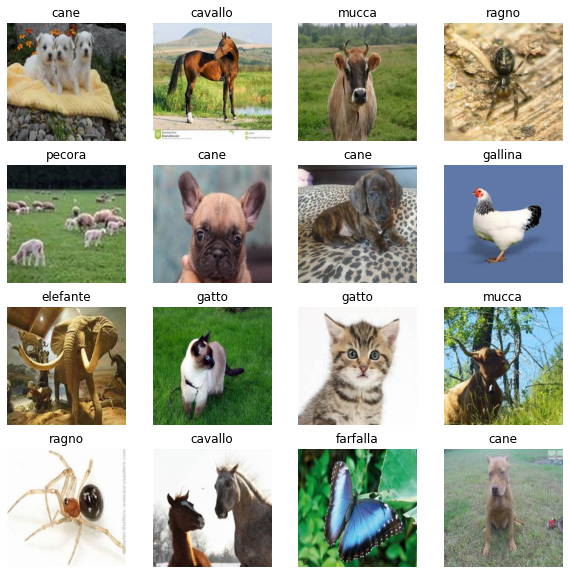

In [19]:
## visualize train set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_train[i]
    name = LABELS[label]
    plt.title(name)
    plt.axis("off")

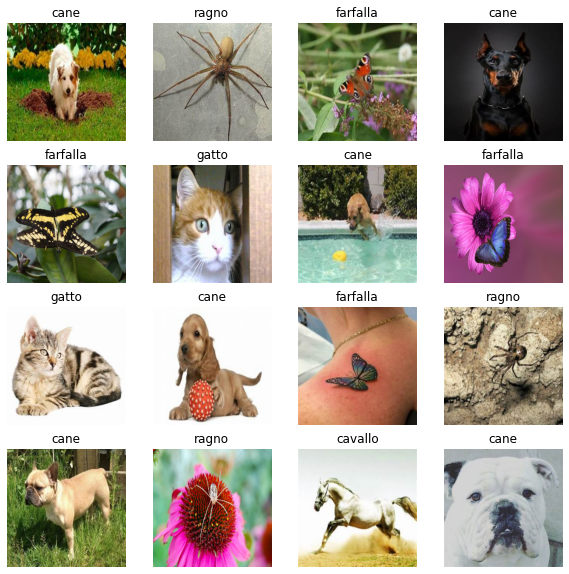

In [20]:
## visualize validation set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(val[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_val[i]
    name = LABELS[label] ## name of the animal class
    plt.title(name)
    plt.axis("off")


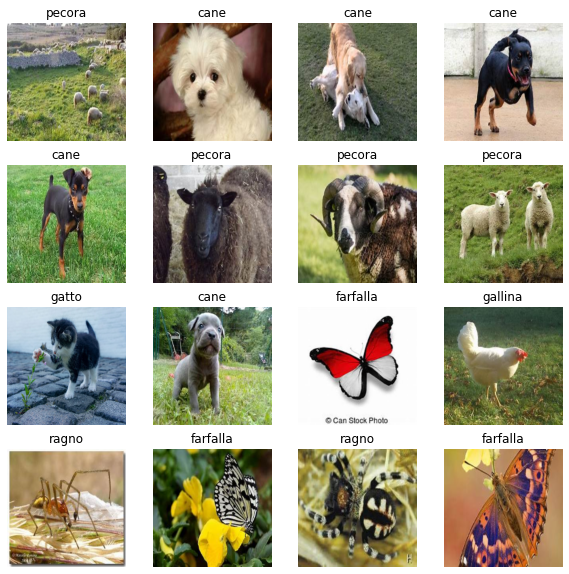

In [21]:
## visualize test set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(test[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_test[i]
    name = LABELS[label]
    plt.title(name)
    plt.axis("off")

2022-01-30 15:09:01.328588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-30 15:09:01.417296: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-30 15:09:01.418030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-30 15:09:01.419944: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

CPU times: user 21.2 s, sys: 2.58 s, total: 23.8 s
Wall time: 27.8 s
18/32 [===============>..............] - ETA: 0s - loss: 5.8987e-05 - accuracy: 1.0000

2022-01-30 15:09:31.046370: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 150528000 exceeds 10% of free system memory.


32/32 [==============================] - 0s 6ms/step - loss: 5.4277e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 5ms/step - loss: 6.3065 - accuracy: 0.3600
Test image accuracy :0.36000001430511475
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
___________

2022-01-30 15:09:32.149227: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


              precision    recall  f1-score   support

        cane       0.33      0.47      0.39        36
     cavallo       0.44      0.42      0.43        19
    elefante       0.11      0.10      0.11        10
    farfalla       0.23      0.18      0.20        17
     gallina       0.25      0.18      0.21        28
       gatto       0.38      0.38      0.38        13
       mucca       0.36      0.40      0.38        10
      pecora       0.25      0.07      0.11        14
       ragno       0.50      0.63      0.56        41
  scoiattolo       0.25      0.17      0.20        12

    accuracy                           0.36       200
   macro avg       0.31      0.30      0.30       200
weighted avg       0.34      0.36      0.34       200



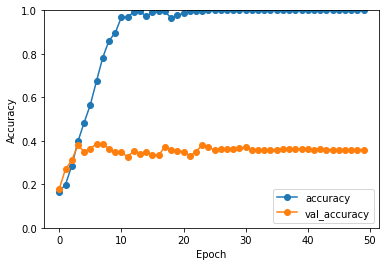

In [22]:
## 4 layer CNN 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_4')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

Model is overfitting

CPU times: user 20.1 s, sys: 916 ms, total: 21.1 s
Wall time: 20.2 s
32/32 [==============================] - 0s 6ms/step - loss: 4.7099e-06 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 6ms/step - loss: 9.5873 - accuracy: 0.2200
Test image accuracy :0.2199999988079071
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 16)      1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_

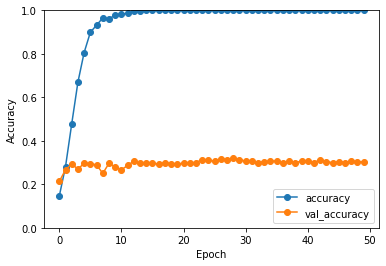

In [23]:
## 4 layer CNN 

model = tf.keras.models.Sequential([
    #tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_4')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 20.6 s, sys: 869 ms, total: 21.5 s
Wall time: 20.7 s
32/32 [==============================] - 0s 6ms/step - loss: 3.7801e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 5ms/step - loss: 5.6545 - accuracy: 0.4350
Test image accuracy :0.4350000023841858
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 16)      1168      
_________________________________________________________________
max_poo

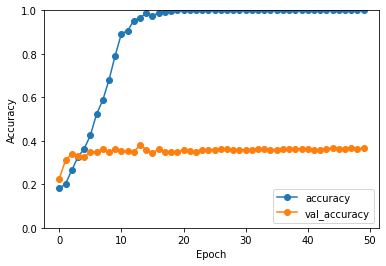

In [24]:
## 5 layer CNN 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_4')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 21.1 s, sys: 932 ms, total: 22.1 s
Wall time: 21.3 s
32/32 [==============================] - 0s 6ms/step - loss: 6.0095e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 6ms/step - loss: 5.0087 - accuracy: 0.4150
Test image accuracy :0.41499999165534973
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
max_po

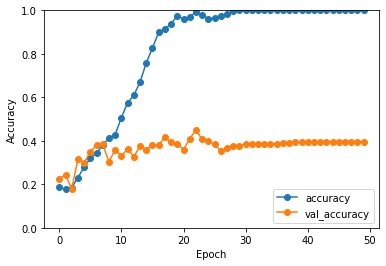

In [25]:
## 6 layer CNN 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_6')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 24.5 s, sys: 974 ms, total: 25.5 s
Wall time: 25.3 s
32/32 [==============================] - 0s 7ms/step - loss: 3.6169e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 6ms/step - loss: 7.5231 - accuracy: 0.4000
Test image accuracy :0.4000000059604645
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
conv2d_

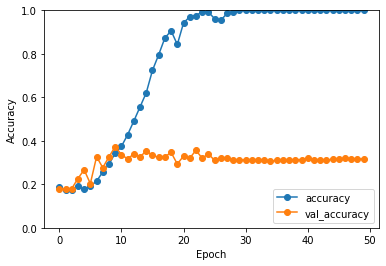

In [26]:
## 7 layer CNN 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_7')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 23.4 s, sys: 998 ms, total: 24.4 s
Wall time: 41.6 s
32/32 [==============================] - 0s 6ms/step - loss: 5.9945e-04 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 6ms/step - loss: 7.3010 - accuracy: 0.3450
Test image accuracy :0.3449999988079071
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
conv2d_

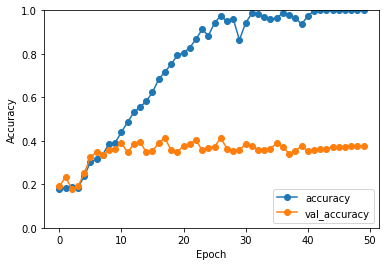

In [27]:
## 7 layer CNN - less filters 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_7')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 24.1 s, sys: 958 ms, total: 25.1 s
Wall time: 25.1 s
32/32 [==============================] - 0s 6ms/step - loss: 0.0124 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 6ms/step - loss: 3.5279 - accuracy: 0.3600
Test image accuracy :0.36000001430511475
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
conv2d_35 

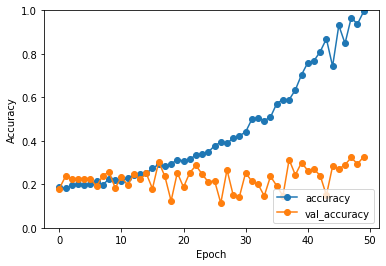

In [28]:
## 7 layer CNN - SGD optimizer
 
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_7')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

SGD Optimizer does not perform better than Adam though the learning in training is slow.

CPU times: user 26.1 s, sys: 951 ms, total: 27.1 s
Wall time: 27 s
32/32 [==============================] - 0s 7ms/step - loss: 1.3041e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 8ms/step - loss: 9.3504 - accuracy: 0.3150
Test image accuracy :0.3149999976158142
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
conv2d_50

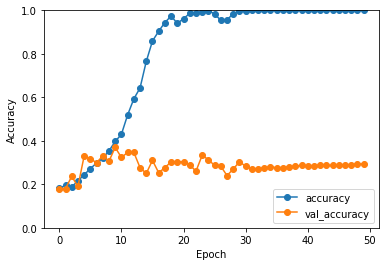

In [30]:
## 8 layer CNN 
 
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_8')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

Summary :  
Its seen that the model overfits to training data. The test accuracy is very poor at max 0.41 for the 6 layer CNN + Max Pooling model.  